In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/leash-BELKA/sample_submission.csv
/kaggle/input/leash-BELKA/train.parquet
/kaggle/input/leash-BELKA/test.parquet
/kaggle/input/leash-BELKA/train.csv
/kaggle/input/leash-BELKA/test.csv


In [2]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 32.5 MB/s eta 0:00:00:00:0100:01


In [3]:
!pip install duckdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 40.7 MB/s eta 0:00:0000:0100:01m


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best parameters for MLP: {'mlp__activation': 'relu', 'mlp__alpha': 0.05, 'mlp__hidden_layer_sizes': (50, 50), 'mlp__learning_rate': 'adaptive', 'mlp__solver': 'sgd'}
Best cross-validation score for MLP: 0.7441666666666666
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best parameters for SVM: {'svm__C': 10, 'svm__gamma': 'auto', 'svm__kernel': 'rbf'}
Best cross-validation score for SVM: 0.7466666666666667
Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__learning_rate=constant, mlp__solver=sgd; total time=  12.8s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50,), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=  15.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=constant, mlp__solver=adam; total time=   4.0s
[CV] END mlp__

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/en

Best parameters for AdaBoost: {'ada__base_estimator__max_depth': 3, 'ada__learning_rate': 1.0, 'ada__n_estimators': 200}
Best cross-validation score for AdaBoost: 0.7408333333333333


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/en


Evaluation for MLP:
Accuracy: 0.7666666666666667
ROC AUC Score: 0.8246308486034513
F1 Score: 0.7697368421052632
Average Precision Score: 0.8381629050016619
Fit Time: 0.08467817306518555
Wall Clock Time: 0.154005765914917

Evaluation for SVM:
Accuracy: 0.78
ROC AUC Score: 0.865015121864437
F1 Score: 0.777027027027027
Average Precision Score: 0.8774671546726645
Fit Time: 0.5071065425872803
Wall Clock Time: 0.4412269592285156

Evaluation for KNN:
Accuracy: 0.7233333333333334
ROC AUC Score: 0.8086639388009251
F1 Score: 0.7635327635327636
Average Precision Score: 0.7712732207459275
Fit Time: 0.4793848991394043
Wall Clock Time: 0.3883349895477295

Evaluation for Decision Tree:
Accuracy: 0.7533333333333333
ROC AUC Score: 0.7535136096779932
F1 Score: 0.7565789473684211
Average Precision Score: 0.7025108225108225
Fit Time: 0.08315277099609375
Wall Clock Time: 0.08174586296081543

Evaluation for AdaBoost:
Accuracy: 0.7
ROC AUC Score: 0.7805995374488525
F1 Score: 0.7058823529411765
Average Preci

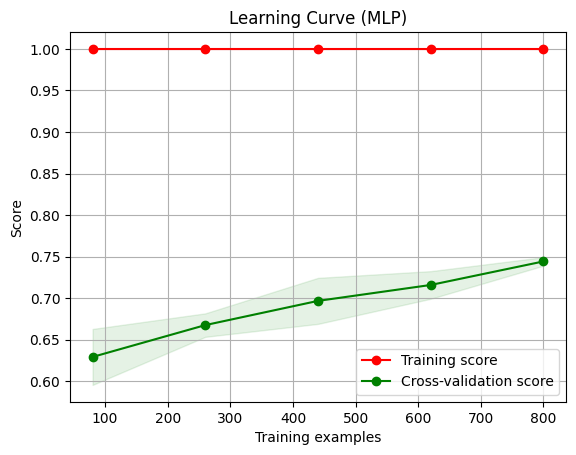

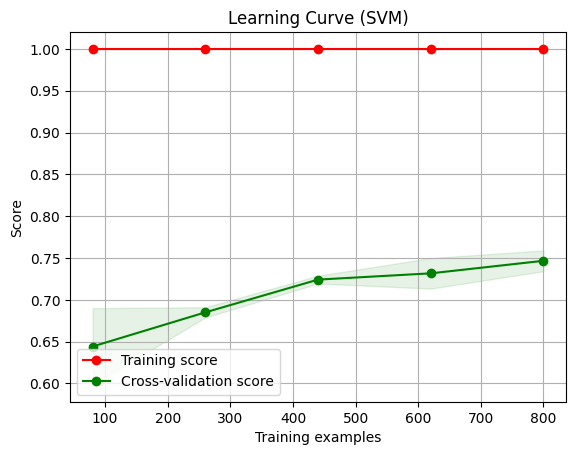

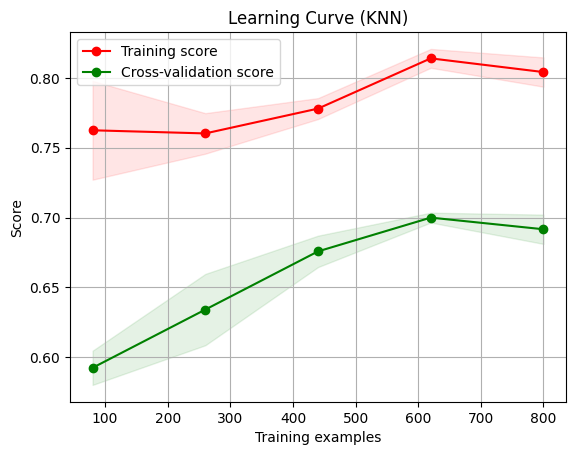

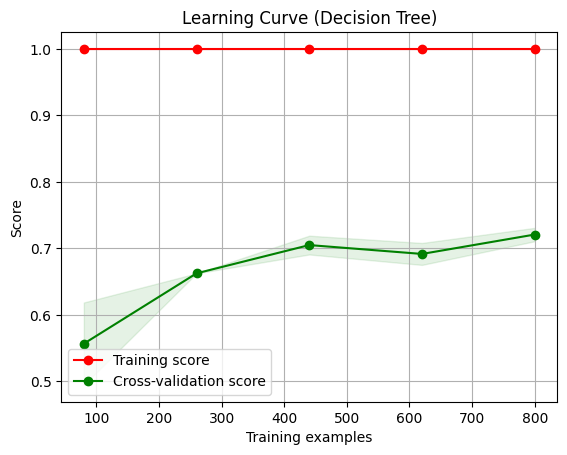

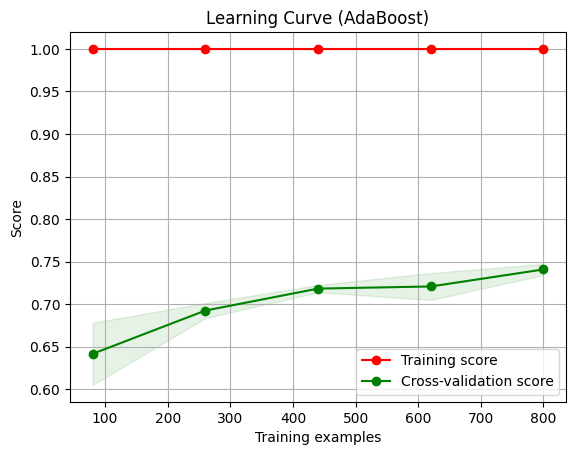

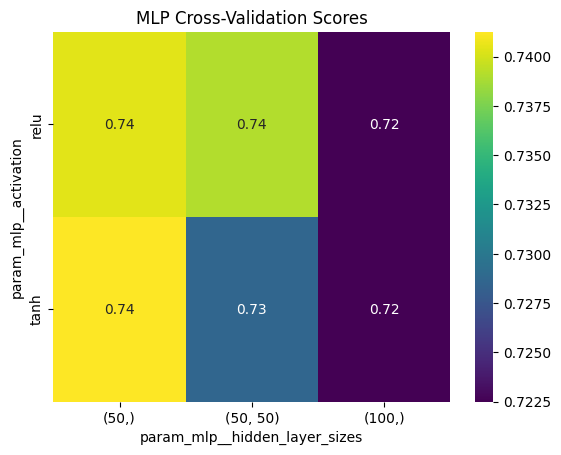

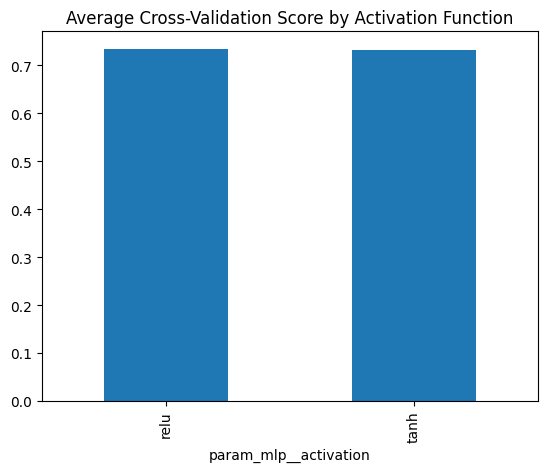

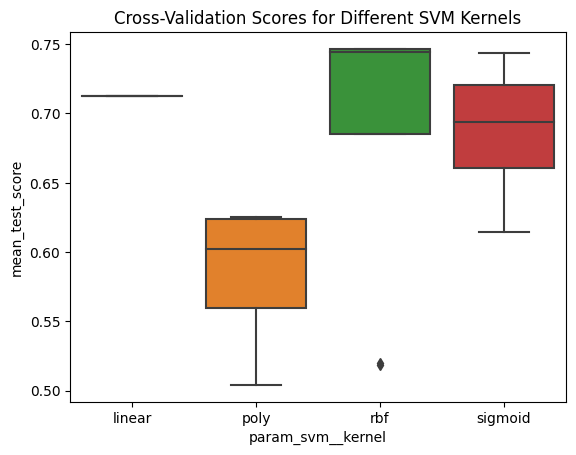

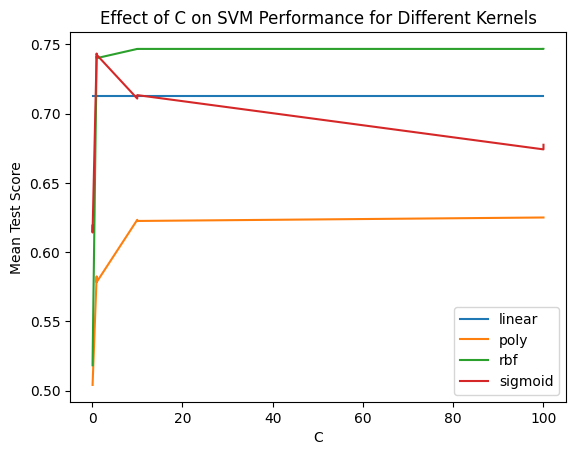

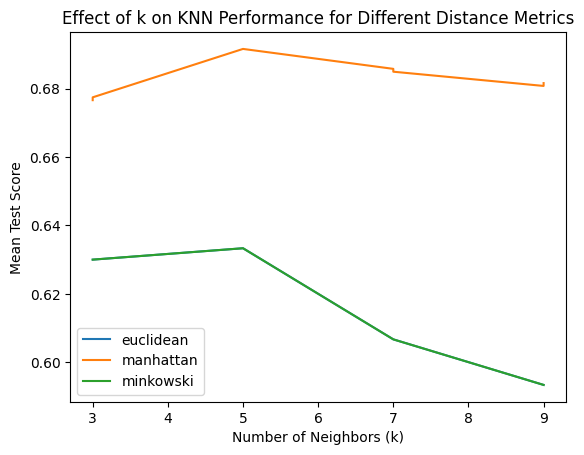

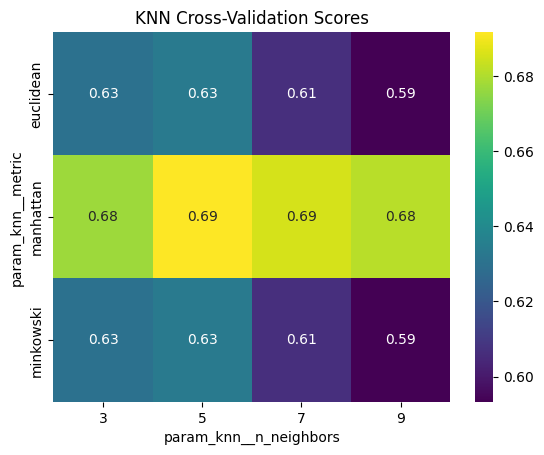

           Model                                    Best Parameters
0            MLP  {'mlp__activation': 'relu', 'mlp__alpha': 0.05...
1            SVM  {'svm__C': 10, 'svm__gamma': 'auto', 'svm__ker...
2            KNN  {'knn__metric': 'manhattan', 'knn__n_neighbors...
3  Decision Tree  {'dt__ccp_alpha': 0.0, 'dt__max_depth': None, ...
4       AdaBoost  {'ada__base_estimator__max_depth': 3, 'ada__le...
           Model  Accuracy  ROC AUC Score  F1 Score  Average Precision Score  \
0            MLP  0.766667       0.824631  0.769737                 0.838163   
1            SVM  0.780000       0.865015  0.777027                 0.877467   
2            KNN  0.723333       0.808664  0.763533                 0.771273   
3  Decision Tree  0.753333       0.753514  0.756579                 0.702511   
4       AdaBoost  0.700000       0.780600  0.705882                 0.805376   

   Fit Time  Wall Clock Time  
0  0.084678         0.154006  
1  0.507107         0.441227  
2  0.479385       

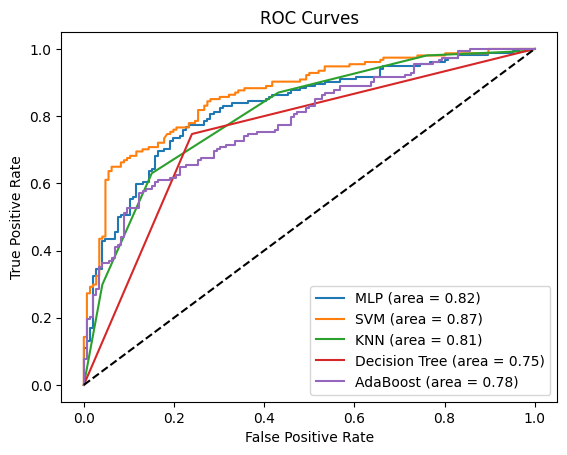

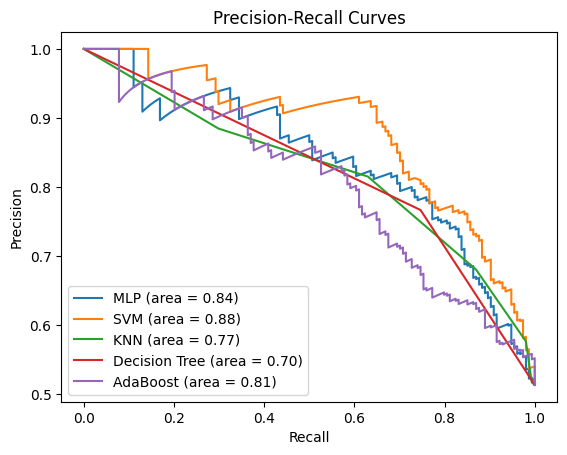

Summary of best parameters and evaluation metrics for each model:
           Model                                    Best Parameters
0            MLP  {'mlp__activation': 'relu', 'mlp__alpha': 0.05...
1            SVM  {'svm__C': 10, 'svm__gamma': 'auto', 'svm__ker...
2            KNN  {'knn__metric': 'manhattan', 'knn__n_neighbors...
3  Decision Tree  {'dt__ccp_alpha': 0.0, 'dt__max_depth': None, ...
4       AdaBoost  {'ada__base_estimator__max_depth': 3, 'ada__le...
           Model  Accuracy  ROC AUC Score  F1 Score  Average Precision Score  \
0            MLP  0.766667       0.824631  0.769737                 0.838163   
1            SVM  0.780000       0.865015  0.777027                 0.877467   
2            KNN  0.723333       0.808664  0.763533                 0.771273   
3  Decision Tree  0.753333       0.753514  0.756579                 0.702511   
4       AdaBoost  0.700000       0.780600  0.705882                 0.805376   

   Fit Time  Wall Clock Time  
0  0.084678   

In [8]:
import os
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, validation_curve
from sklearn.metrics import average_precision_score, accuracy_score, roc_auc_score, f1_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import duckdb
import time

# Set random seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# Function to generate ECFPs
def generate_ecfp(molecule, radius=2, bits=1024):
    if molecule is None:
        return [0] * bits
    return list(AllChem.GetMorganFingerprintAsBitVect(molecule, radius, nBits=bits))

# Load and preprocess data
train_path = '/kaggle/input/leash-BELKA/train.parquet'
test_path = '/kaggle/input/leash-BELKA/test.parquet'

con = duckdb.connect()
query = f"""
    (SELECT * FROM parquet_scan('{train_path}') WHERE binds = 0 ORDER BY random() LIMIT 750)  -- Reduced to 750
    UNION ALL
    (SELECT * FROM parquet_scan('{train_path}') WHERE binds = 1 ORDER BY random() LIMIT 750)  -- Reduced to 750
"""
df = con.query(query).df()
con.close()

# Convert SMILES to RDKit molecules
df['molecule'] = df['molecule_smiles'].apply(Chem.MolFromSmiles)
df['ecfp'] = df['molecule'].apply(generate_ecfp)

# One-hot encode the protein_name
onehot_encoder = OneHotEncoder(sparse_output=False)
protein_onehot = onehot_encoder.fit_transform(df['protein_name'].values.reshape(-1, 1))

# Combine ECFPs and one-hot encoded protein_name
X = [ecfp + list(protein) for ecfp, protein in zip(df['ecfp'], protein_onehot)]
y = df['binds'].values

# Split the data into train and test sets with a fixed random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

# Define a function to plot learning curves
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, random_state=RANDOM_SEED)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    return plt

# Define a function to plot validation curves
def plot_validation_curve(estimator, title, X, y, param_name, param_range, cv=None, n_jobs=None):
    train_scores, test_scores = validation_curve(estimator, X, y, param_name=param_name, param_range=param_range, cv=cv, n_jobs=n_jobs, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    plt.grid()
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(param_range, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(param_range, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

# Neural Network
mlp_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(random_state=RANDOM_SEED, max_iter=1000))  # Increased max_iter to 1000
])

mlp_param_grid = {
    'mlp__hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'mlp__activation': ['tanh', 'relu'],
    'mlp__solver': ['sgd', 'adam'],
    'mlp__alpha': [0.0001, 0.05],
    'mlp__learning_rate': ['constant', 'adaptive'],
}

mlp_grid_search = GridSearchCV(mlp_pipeline, param_grid=mlp_param_grid, cv=3, n_jobs=-1, verbose=2)
mlp_grid_search.fit(X_train, y_train)

print("Best parameters for MLP:", mlp_grid_search.best_params_)
print("Best cross-validation score for MLP:", mlp_grid_search.best_score_)
mlp_best = mlp_grid_search.best_estimator_

# Plot learning curve for the best MLP model
plot_learning_curve(mlp_best, "Learning Curve (MLP)", X_train, y_train, cv=3, n_jobs=-1)

# Support Vector Machine
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True, random_state=RANDOM_SEED))
])

svm_param_grid = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svm__gamma': ['scale', 'auto'],
}

svm_grid_search = GridSearchCV(svm_pipeline, param_grid=svm_param_grid, cv=3, n_jobs=-1, verbose=2)
svm_grid_search.fit(X_train, y_train)

print("Best parameters for SVM:", svm_grid_search.best_params_)
print("Best cross-validation score for SVM:", svm_grid_search.best_score_)
svm_best = svm_grid_search.best_estimator_

# Plot learning curve for the best SVM model
plot_learning_curve(svm_best, "Learning Curve (SVM)", X_train, y_train, cv=3, n_jobs=-1)

# K-Nearest Neighbors
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

knn_param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski'],
}

knn_grid_search = GridSearchCV(knn_pipeline, param_grid=knn_param_grid, cv=3, n_jobs=-1, verbose=2)
knn_grid_search.fit(X_train, y_train)

print("Best parameters for KNN:", knn_grid_search.best_params_)
print("Best cross-validation score for KNN:", knn_grid_search.best_score_)
knn_best = knn_grid_search.best_estimator_

# Plot learning curve for the best KNN model
plot_learning_curve(knn_best, "Learning Curve (KNN)", X_train, y_train, cv=3, n_jobs=-1)

# Decision Tree
dt_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeClassifier(random_state=RANDOM_SEED))
])

dt_param_grid = {
    'dt__max_depth': [None, 10, 20, 30],
    'dt__min_samples_split': [2, 5, 10],
    'dt__min_samples_leaf': [1, 2, 4],
    'dt__ccp_alpha': [0.0, 0.01, 0.1]  # Pruning parameter
}

dt_grid_search = GridSearchCV(dt_pipeline, param_grid=dt_param_grid, cv=3, n_jobs=-1, verbose=2)
dt_grid_search.fit(X_train, y_train)

print("Best parameters for Decision Tree:", dt_grid_search.best_params_)
print("Best cross-validation score for Decision Tree:", dt_grid_search.best_score_)
dt_best = dt_grid_search.best_estimator_

# Plot learning curve for the best Decision Tree model
plot_learning_curve(dt_best, "Learning Curve (Decision Tree)", X_train, y_train, cv=3, n_jobs=-1)

# AdaBoost (with Decision Tree as base estimator)
ada_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ada', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=RANDOM_SEED), random_state=RANDOM_SEED))
])

ada_param_grid = {
    'ada__n_estimators': [50, 100, 200],
    'ada__learning_rate': [0.01, 0.1, 1.0],
    'ada__base_estimator__max_depth': [1, 2, 3],
}

ada_grid_search = GridSearchCV(ada_pipeline, param_grid=ada_param_grid, cv=3, n_jobs=-1, verbose=2)
ada_grid_search.fit(X_train, y_train)

print("Best parameters for AdaBoost:", ada_grid_search.best_params_)
print("Best cross-validation score for AdaBoost:", ada_grid_search.best_score_)
ada_best = ada_grid_search.best_estimator_

# Plot learning curve for the best AdaBoost model
plot_learning_curve(ada_best, "Learning Curve (AdaBoost)", X_train, y_train, cv=3, n_jobs=-1)

# Evaluation Metrics
def evaluate_model(model, X_test, y_test):
    start_time = time.time()
    y_pred = model.predict(X_test)
    fit_time = time.time() - start_time

    start_time = time.time()
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    wall_clock_time = time.time() - start_time

    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    f1 = f1_score(y_test, y_pred)
    avg_precision = average_precision_score(y_test, y_pred_proba)

    print("Accuracy:", accuracy)
    print("ROC AUC Score:", roc_auc)
    print("F1 Score:", f1)
    print("Average Precision Score:", avg_precision)
    print("Fit Time:", fit_time)
    print("Wall Clock Time:", wall_clock_time)

    return accuracy, roc_auc, f1, avg_precision, fit_time, wall_clock_time

print("\nEvaluation for MLP:")
mlp_results = evaluate_model(mlp_best, X_test, y_test)

print("\nEvaluation for SVM:")
svm_results = evaluate_model(svm_best, X_test, y_test)

print("\nEvaluation for KNN:")
knn_results = evaluate_model(knn_best, X_test, y_test)

print("\nEvaluation for Decision Tree:")
dt_results = evaluate_model(dt_best, X_test, y_test)

print("\nEvaluation for AdaBoost:")
ada_results = evaluate_model(ada_best, X_test, y_test)

plt.show()

# Visualization of grid search results for MLP
results_mlp = pd.DataFrame(mlp_grid_search.cv_results_)
pivot_table_mlp = results_mlp.pivot_table(index="param_mlp__activation", columns="param_mlp__hidden_layer_sizes", values="mean_test_score")
sns.heatmap(pivot_table_mlp, annot=True, cmap="viridis")
plt.title('MLP Cross-Validation Scores')
plt.show()

results_mlp.groupby('param_mlp__activation')['mean_test_score'].mean().plot(kind='bar')
plt.title('Average Cross-Validation Score by Activation Function')
plt.show()

# Visualization of grid search results for SVM
results_svm = pd.DataFrame(svm_grid_search.cv_results_)
sns.boxplot(x='param_svm__kernel', y='mean_test_score', data=results_svm)
plt.title('Cross-Validation Scores for Different SVM Kernels')
plt.show()

for kernel in results_svm['param_svm__kernel'].unique():
    subset = results_svm[results_svm['param_svm__kernel'] == kernel]
    plt.plot(subset['param_svm__C'], subset['mean_test_score'], label=kernel)
plt.xlabel('C')
plt.ylabel('Mean Test Score')
plt.title('Effect of C on SVM Performance for Different Kernels')
plt.legend()
plt.show()

# Visualization of grid search results for KNN
results_knn = pd.DataFrame(knn_grid_search.cv_results_)
for metric in results_knn['param_knn__metric'].unique():
    subset = results_knn[results_knn['param_knn__metric'] == metric]
    plt.plot(subset['param_knn__n_neighbors'], subset['mean_test_score'], label=metric)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Test Score')
plt.title('Effect of k on KNN Performance for Different Distance Metrics')
plt.legend()
plt.show()

pivot_table_knn = results_knn.pivot_table(index="param_knn__metric", columns="param_knn__n_neighbors", values="mean_test_score")
sns.heatmap(pivot_table_knn, annot=True, cmap="viridis")
plt.title('KNN Cross-Validation Scores')
plt.show()

# Summary table
best_params_mlp = mlp_grid_search.best_params_
best_params_svm = svm_grid_search.best_params_
best_params_knn = knn_grid_search.best_params_
best_params_dt = dt_grid_search.best_params_
best_params_ada = ada_grid_search.best_params_

summary_table = pd.DataFrame({
    'Model': ['MLP', 'SVM', 'KNN', 'Decision Tree', 'AdaBoost'],
    'Best Parameters': [best_params_mlp, best_params_svm, best_params_knn, best_params_dt, best_params_ada]
})
print(summary_table)

# Evaluation results
eval_results = pd.DataFrame({
    'Model': ['MLP', 'SVM', 'KNN', 'Decision Tree', 'AdaBoost'],
    'Accuracy': [mlp_results[0], svm_results[0], knn_results[0], dt_results[0], ada_results[0]],
    'ROC AUC Score': [mlp_results[1], svm_results[1], knn_results[1], dt_results[1], ada_results[1]],
    'F1 Score': [mlp_results[2], svm_results[2], knn_results[2], dt_results[2], ada_results[2]],
    'Average Precision Score': [mlp_results[3], svm_results[3], knn_results[3], dt_results[3], ada_results[3]],
    'Fit Time': [mlp_results[4], svm_results[4], knn_results[4], dt_results[4], ada_results[4]],
    'Wall Clock Time': [mlp_results[5], svm_results[5], knn_results[5], dt_results[5], ada_results[5]]
})
print(eval_results)

plt.show()

# ROC and Precision-Recall Curves
def plot_roc_curve(model, X_test, y_test, model_name):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{model_name} (area = {roc_auc_score(y_test, y_pred_proba):.2f})")

def plot_precision_recall_curve(model, X_test, y_test, model_name):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    plt.plot(recall, precision, label=f"{model_name} (area = {average_precision_score(y_test, y_pred_proba):.2f})")

plt.figure()
plot_roc_curve(mlp_best, X_test, y_test, "MLP")
plot_roc_curve(svm_best, X_test, y_test, "SVM")
plot_roc_curve(knn_best, X_test, y_test, "KNN")
plot_roc_curve(dt_best, X_test, y_test, "Decision Tree")
plot_roc_curve(ada_best, X_test, y_test, "AdaBoost")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="best")
plt.show()

plt.figure()
plot_precision_recall_curve(mlp_best, X_test, y_test, "MLP")
plot_precision_recall_curve(svm_best, X_test, y_test, "SVM")
plot_precision_recall_curve(knn_best, X_test, y_test, "KNN")
plot_precision_recall_curve(dt_best, X_test, y_test, "Decision Tree")
plot_precision_recall_curve(ada_best, X_test, y_test, "AdaBoost")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc="best")
plt.show()

# Decision Surface
def plot_decision_surface(model, X, y, title):
    h = .02  # step size in the mesh

    X = np.array(X)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=20)
    plt.title(title)
    plt.show()

# Summary
print("Summary of best parameters and evaluation metrics for each model:")
print(summary_table)
print(eval_results)
